# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('X_train is a',type(X_train),' and y_train is a',type(y_train))
print('X_valid is a',type(X_valid),' and y_valid is a',type(y_valid))
print('X_test is a',type(X_test),' and y_test is a',type(y_test))

X_train is a <class 'numpy.ndarray'>  and y_train is a <class 'numpy.ndarray'>
X_valid is a <class 'numpy.ndarray'>  and y_valid is a <class 'numpy.ndarray'>
X_test is a <class 'numpy.ndarray'>  and y_test is a <class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
class_counts = pd.Series(np.array(y_train)).value_counts()
n_classes = class_counts.values.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

valid_counts = pd.Series(np.array(y_valid)).value_counts()
test_counts = pd.Series(np.array(y_test)).value_counts()

sign_names = pd.read_csv('signnames.csv')
frames = [class_counts.sort_index(),valid_counts.sort_index(),test_counts.sort_index(),sign_names]
print("Histogram:")
print(pd.concat(frames,axis=1))

Histogram:
       0    1    2  ClassId                                           SignName
0    180   30   60        0                               Speed limit (20km/h)
1   1980  240  720        1                               Speed limit (30km/h)
2   2010  240  750        2                               Speed limit (50km/h)
3   1260  150  450        3                               Speed limit (60km/h)
4   1770  210  660        4                               Speed limit (70km/h)
5   1650  210  630        5                               Speed limit (80km/h)
6    360   60  150        6                        End of speed limit (80km/h)
7   1290  150  450        7                              Speed limit (100km/h)
8   1260  150  450        8                              Speed limit (120km/h)
9   1320  150  480        9                                         No passing
10  1800  210  660       10       No passing for vehicles over 3.5 metric tons
11  1170  150  420       11              

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

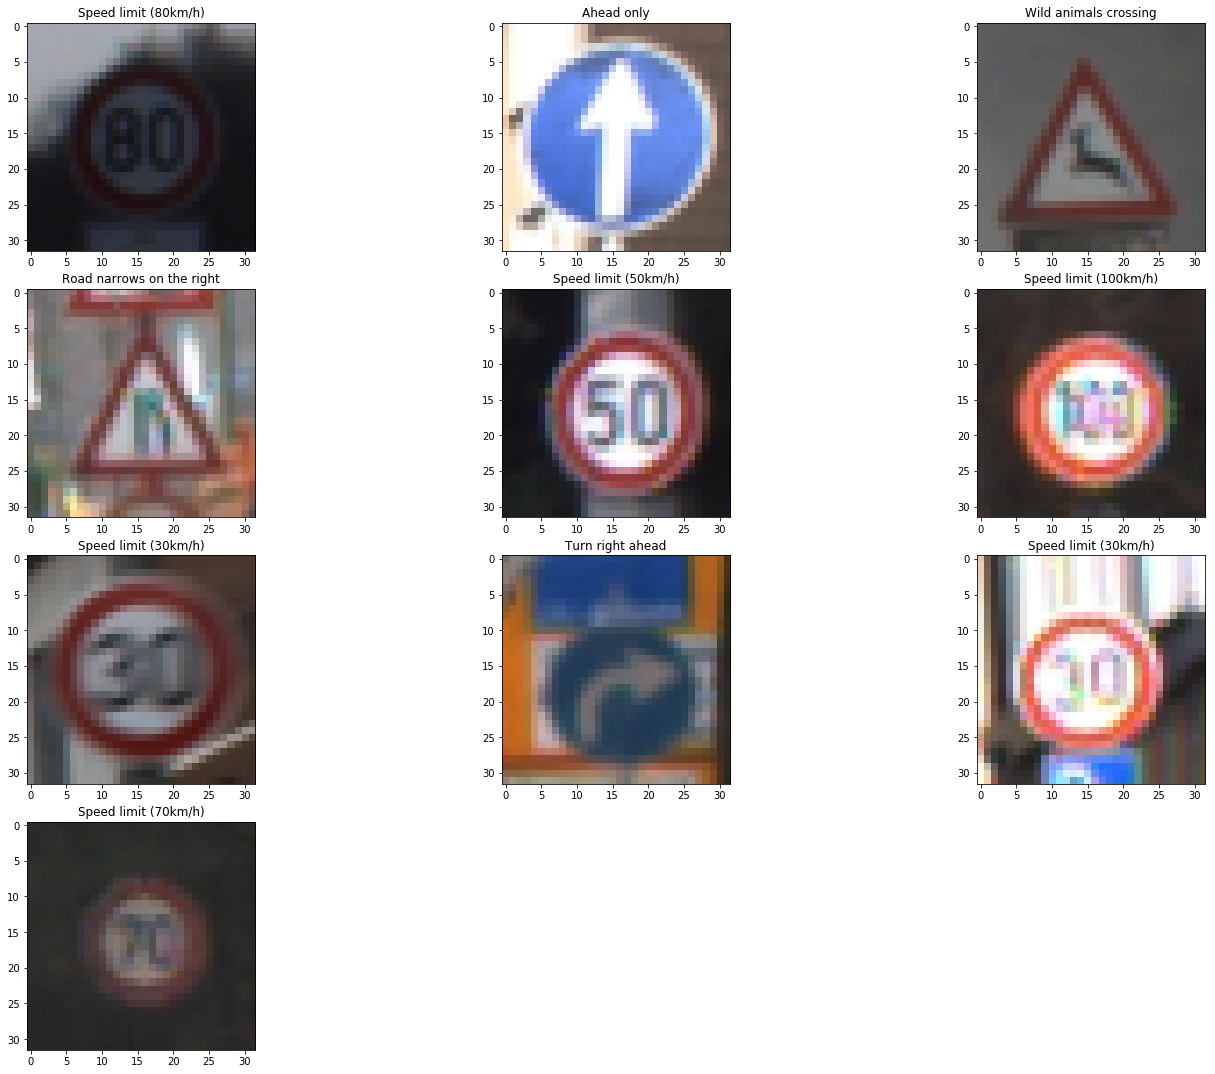

In [5]:
import random

# Display a few signs
rng = [random.randint(0, len(X_train)) for i in range(0,10)]
#rng=range(index,index+10)
plt.figure(1,figsize=(20,15))
for i,t in enumerate(rng):
    img = X_train[rng[i]]
    title = sign_names.loc[y_train[rng[i]] ,'SignName']
    # print(i,rng[i], title)
    plt.subplot(4,3,i+1)
    plt.imshow(img)
    plt.title(title)
    plt.tight_layout(pad=1., h_pad=0.5, w_pad=0.5)
plt.show()

In [6]:
def flip_extend(X, y):
    """
    This function was stolen from Alex Staravoitau.
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

In [7]:
# A debugging function
def caller_name(skip=2):
    """Get a name of a caller in the format module.class.method

       `skip` specifies how many levels of stack to skip while getting caller
       name. skip=1 means "who calls me", skip=2 "who calls my caller" etc.

       An empty string is returned if skipped levels exceed stack height
    """
    stack = inspect.stack()
    start = 0 + skip
    if len(stack) < start + 1:
      return ''
    parentframe = stack[start][0]    

    name = []
    module = inspect.getmodule(parentframe)
    # `modname` can be None when frame is executed directly in console
    # TODO(techtonik): consider using __main__
    if module:
        name.append(module.__name__)
    # detect classname
    if 'self' in parentframe.f_locals:
        # I don't know any way to detect call from the object method
        # XXX: there seems to be no way to detect static method call - it will
        #      be just a function call
        name.append(parentframe.f_locals['self'].__class__.__name__)
    codename = parentframe.f_code.co_name
    if codename != '<module>':  # top level usually
        name.append( codename ) # function or a method

    ## Avoid circular refs and frame leaks
    #  https://docs.python.org/2.7/library/inspect.html#the-interpreter-stack
    del parentframe, stack

    return ".".join(name)

In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)


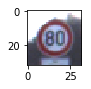

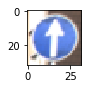

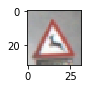

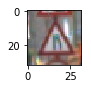

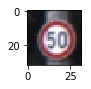

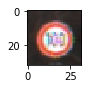

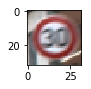

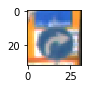

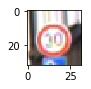

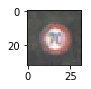

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import inspect

# I want the optimiser to select the best conversion to grayscale itself. To that effect, I intend to use a 1x1 convolution
# on the complete picture, and the NN will learn the best colour space conversion by itself.

# Service function to get the encodings for black and white
def get_encoding_limits(img, in_mini, in_maxi):
    if isinstance(img[0, 0, 0] ,np.uint8):
        if in_maxi is None: in_maxi=255
        if in_mini is None: in_mini=0
    else:
        mini = np.min(img)
        maxi = np.max(img)
        if mini >= -1. and maxi <=.1:
            if in_maxi is None: 
                in_maxi = 1.
            else:
                in_maxi = np.float32(in_maxi)
            
            if in_mini is None:
                # Heuristic will not always work
                if mini<0:
                    in_mini = -1.
                else:
                    in_mini = 0.                
                    if __debug__:
                        print('Warning: unable to ascertain image encoding automatically (supply in_mini)')
                        print('get_encoding_limits() called from',caller_name())
            else:
                in_mini = np.float32(in_mini)
        else:
            if in_mini is None or in_maxi is None:
                in_mini = mini
                in_maxi = maxi
                if __debug__:
                    print('Warning: unable to ascertain image encoding automatically (supply in_mini and in_maxi)')
                    print('Minimum pixel value is', mini, ' and maximum pixel value is', maxi)
                    print('get_encoding_limits() called from',caller_name())
    return in_mini, in_maxi

def numpify_type(in_type, force_float=False):
    # Supported numpy types
    # The trick here, is to index the dictionnary with np.dtype(in_type) rather than in_type
    # because the call converts standard Python types to equivalent numpy types.
    # In addition np.int32 is an instance of <class 'type'> whereas ndarray.dtype is an instance of <class 'dtype'>
    out_type = {
        np.dtype(np.float32): np.float32,
        np.dtype(np.int32): np.int32,
        np.dtype(np.int8): np.int8,
        np.dtype(np.uint8): np.uint8,
        np.dtype(np.uint32): np.uint32,
        np.dtype(np.float64): np.float64,
    }.get(np.dtype(in_type))
    if out_type is None and force_float:
        out_type = np.float32
    #if not(in_type is out_type):
    #    print(in_type,'adjusted to',out_type,'in',caller_name())
    assert not(out_type is None), 'Out_type must be defined in call to '+ caller_name()
    return out_type
    
def grayscale(img, out_type=None):
    """
    The algorithm works for any linear encoding because it is a weighted average.
    The output is converted to the requested type without a change of encoding. That is, if the input
    is uint8 and the requested output encoding is float32, pixel values will still lay in interval [0.0, 255.0].
    """
    #sh=img.shape[0:2]+(1,)
    #out = np.empty(shape=sh)
    if out_type is None: 
        out_type=img.dtype
    out_type=numpify_type(out_type)
    if img.shape[2]==3 :     #RGB
        out = img.dot(np.array([[0.2126], [0.7152], [0.0722]]))
        #out = img.dot(np.array([[1], [0], [0]]))  # Red channel
        #out = img.dot(np.array([[0], [1], [0]]))  # Green channel
        #out = img.dot(np.array([[0], [0], [1]]))  # Blue channel
    elif img.shape[2]==4 :   #RGBA
        assert True, 'RGBA Grayscale is not properly implemented (loses alpha channel)'
        out = img.dot(np.array([[0.2126], [0.7152], [0.0722], [0]]))
    else:
        out = img[:,:,range(1)]  # Return first channel in case it's not grayscale either
    out = out_type(out)
    #print(out.shape,out.dtype)
    return out

# Here, I will only try to homogenize brightness through an appropriate scaling of R,G,B.
def auto_brightness(img, in_mini=None, in_maxi=None, factor=2):
    """
    Automatic brightness adjustment
    """ 
    out_type=numpify_type(img.dtype)
    # in_mini and in_maxi are garanteed to be numbers of the same type as image pixel RGB values
    mini, maxi = get_encoding_limits(img, in_mini, in_maxi)
    # Brightness is adjusted by scaling the max value to maxi
    gray = grayscale(img,np.float32)
    m = np.max(gray) - mini
    # But the central zone mean brightness cannot be less than half of the maximum
    mean = np.mean(gray[8:23, 8:23]) - mini
    #print('Auto-adjusting brightness of image',img.shape,'black =',mini,'mean =',mean+mini,'maximum =',m+mini,'white =',maxi)
    if m==0:
        # Image is black
        out=img
    else:
        # If mean value of central zone is too low, normalize based on multiple of mean
        if m>factor*mean:
            m=factor*mean
        #out = img    
        #print(m)
        out=np.float64(img)
        out= mini+((maxi-mini)/m)*(out-mini)
        out = np.maximum(np.minimum(out, maxi), mini)
    # Round result if output type is integer
    if not ( {
        np.dtype(np.int32): np.int32,
        np.dtype(np.int8): np.int8,
        np.dtype(np.uint8): np.uint8,
        np.dtype(np.uint32): np.uint32,
    }.get(np.dtype(out_type)) is None) :
        out = out.round()
    out = out_type(out)
    #print(np.min(out),np.max(out))
    return out  

def recode(img, mini=-1,maxi=1, in_mini=None, in_maxi=None, out_type=None):
    """
    Recode pixel values with different limits and type.
    Defaults are appropriate for neural network application.
    """
    out_type=numpify_type(out_type)        
    # in_mini and in_maxi are garanteed to be numbers of the same type as image pixel RGB values
    in_mini, in_maxi = get_encoding_limits(img, in_mini, in_maxi)
    out = mini+((maxi-mini)*(img-in_mini))/(in_maxi-in_mini)
    out = np.maximum(np.minimum(out, maxi), mini)
    try:
        out = out_type(out)
    except:
        if __debug__: raise AssertionError('Invalid out_type in recode()')
    return out
    
def normalize_images(x,mini=-1.,maxi=1., in_mini=None, in_maxi=None):
    """
    Recodes a set of images 
    """
    out=np.empty_like(x,dtype=np.float32)
    for i,img in enumerate(x):
        bright = auto_brightness(img)
        #show_sign(bright)
        out[i] = recode(bright, mini=-1., maxi=1., out_type=np.float32)
    return out
        
def show_sign(x,in_mini=None,in_maxi=None):
    img = recode(x,mini=0.,maxi=1., in_mini=in_mini, in_maxi=in_maxi, out_type=np.float32)
    print('In:',type(x),type(x[0, 0, 0]),x.shape)
    #print('Out:',type(img),type(img[0, 0, 0]),img.shape)
    plt.figure(figsize=(1,1))
    if img.shape[2]==1:
        plt.imshow(img[:,:,0].tolist(), cmap='gray')
    else:
        plt.imshow(img.tolist())

# Display the same images with homogenized maximum brightness
homo_bright = normalize_images(X_train[rng]) 
#print('Normalized data is a',type(homo_bright),'of',type(homo_bright[0].tolist()[0][0][0]))
for img in homo_bright :
    show_sign(img, in_mini=-1., in_maxi=1.)



In [9]:
print('Encoding images ...')
X_norm_train = normalize_images(X_train)
X_norm_valid = normalize_images(X_valid)
X_norm_test = normalize_images(X_test)
assert len(X_norm_train) == len(y_train), 'Features vector length differs from labels vector length'

print('Extending training data set ...')
X_ext_train, y_ext_train = flip_extend(X_norm_train, y_train)

print('Done.')

Encoding images ...
Extending training data set ...
Done.


### Model Architecture

In [11]:
import tensorflow as tf

#y_one_hot_test = tf.one_hot(y_test,n_classes,axis=-1)
#y_one_hot_valid = tf.one_hot(y_valid,n_classes,axis=-1)
#y_one_hot_test = tf.one_hot(y_test,n_classes,axis=-1)### Define your architecture here.

### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x,keep):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    unity_tfm = tf.constant([[[[1,0,0,-1,0,0],[0,1,0,0,-1,0],[0,0,1,0,0,-1]]]],shape=[1,1,3,6],dtype=np.float32,verify_shape=True)
    unity2_tfm = tf.constant([[[[1,0,0,-1,0,0],[0,1,0,0,-1,0],[0,0,1,0,0,-1],[-1,0,0,1,0,0],[0,-1,0,0,1,0],[0,0,-1,0,0,1]]]],shape=[1,1,6,6],dtype=np.float32,verify_shape=True)
    unity3_tfm = tf.constant([[[[1,0,0],[0,1,0],[0,0,1],[-1,0,0],[0,-1,0],[0,0,-1]]]],shape=[1,1,6,3],dtype=np.float32,verify_shape=True)
    
    weights ={
        'wccs1' : tf.Variable(tf.add(unity_tfm,tf.truncated_normal(shape=[1,1,3,6],mean=mu,stddev=sigma)),name='wccs1'),
        'wccs2' : tf.Variable(tf.add(unity2_tfm,tf.truncated_normal(shape=[1,1,6,6],mean=mu,stddev=sigma)),name='wccs2'),
        'wccs3' : tf.Variable(tf.add(unity3_tfm,tf.truncated_normal(shape=[1,1,6,3],mean=mu,stddev=sigma)),name='wccs3'),
        'wc1' : tf.Variable(tf.truncated_normal(shape=[5,5,3,6],mean=mu,stddev=sigma)),
        'wc2' : tf.Variable(tf.truncated_normal(shape=[5,5,6,16],mean=mu,stddev=sigma)),
        'wd3' : tf.Variable(tf.truncated_normal(shape=[400,120],mean=mu,stddev=sigma)),
        'wd4' : tf.Variable(tf.truncated_normal(shape=[120,84],mean=mu,stddev=sigma)),
        'wd5' : tf.Variable(tf.truncated_normal(shape=[84,n_classes],mean=mu,stddev=sigma))
    }
    biases ={
        'bccs1' : tf.Variable(tf.zeros(shape=[6]),name='bccs1'),
        'bccs2' : tf.Variable(tf.zeros(shape=[6]),name='bccs2'),
        'bccs3' : tf.Variable(tf.zeros(shape=[3]),name='bccs3'),
        'bc1' : tf.Variable(tf.zeros(shape=[6])),
        'bc2' : tf.Variable(tf.zeros(shape=[16])),
        'bd3' : tf.Variable(tf.zeros(shape=[120])),
        'bd4' : tf.Variable(tf.zeros(shape=[84])),
        'bd5' : tf.Variable(tf.zeros(shape=[n_classes]))
    }
    print('Graph set up for ',n_classes,' classes.')
    # Colour space conversion layer 1
    csc1 = tf.nn.conv2d(x,weights['wccs1'],strides=[1,1,1,1],padding='VALID', name='csc1_conv')
    csc1 = tf.nn.bias_add(csc1,biases['bccs1'],name='csc1_bias')
    csc1 = tf.nn.relu(csc1, name='csc1_relu')
    # Colour space conversion layer 2
    csc2 = tf.nn.conv2d(csc1,weights['wccs2'],strides=[1,1,1,1],padding='VALID', name='csc2_conv')
    csc2 = tf.nn.bias_add(csc2,biases['bccs2'],name='csc2_bias')
    csc2 = tf.nn.relu(csc2, name='csc2_relu')
    # Colour space conversion layer 3
    csc3 = tf.nn.conv2d(csc2,weights['wccs3'],strides=[1,1,1,1],padding='VALID', name='csc3_conv')
    colorspace = tf.nn.bias_add(csc3,biases['bccs3'],name='csc3_bias')
    csc3 = tf.nn.relu(colorspace, name='csc3_relu')
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    layer1 = tf.nn.conv2d(csc3,weights['wc1'],strides=[1,1,1,1],padding='VALID',name='l1_conv')
    layer1 = tf.nn.bias_add(layer1,biases['bc1'], name='l1_bias')
    # Activation.
    layer1 = tf.nn.relu(layer1, name='l1_relu')
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(layer1,strides=[1,2,2,1],ksize=[1,2,2,1],padding='VALID',name='l1_pool')
    # Layer 2: Convolutional. Output = 10x10x16.
    layer2 = tf.nn.conv2d(pool1,weights['wc2'],strides=[1,1,1,1],padding='VALID',name='l2_conv')
    layer2 = tf.nn.bias_add(layer2,biases['bc2'], name='l2_bias')
    # Activation.
    layer2 = tf.nn.relu(layer2, name='l2_relu')
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(layer2,strides=[1,2,2,1],ksize=[1,2,2,1],padding='VALID',name='l2_pool')
    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3 = tf.add(tf.matmul(flat,weights['wd3'], name='l3_linear'),biases['bd3'],name='l3_bias')
    # Activation.
    layer3 = tf.nn.relu(layer3, name='l3_relu')
    # Dropout
    #layer3 = tf.nn.dropout(layer3,keep)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4 = tf.add(tf.matmul(layer3,weights['wd4'], name='l4_linear'),biases['bd4'], name='l4_bias')
    # Activation.
    layer4 = tf.nn.relu(layer4, name='l4_bias')
    # Dropout
    layer4 = tf.nn.dropout(layer4,keep, name='l4_dropout')
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(layer4,weights['wd5'], name='l5_linear'),biases['bd5'], name='l5_bias')
    return logits , colorspace

# Finish defining training pipeline
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='X_image_batch')
y = tf.placeholder(tf.int32, (None), name='y_class')
one_hot_y = tf.one_hot(y, n_classes)

# Tried rates
# rate = 0.01
rate = 0.001
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

logits , recolored = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name='cross_entropy')
loss_operation = tf.reduce_mean(cross_entropy, name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate = rate, name='optimizer')
training_operation = optimizer.minimize(loss_operation, name='training')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='correct')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')
saver = tf.train.Saver()


Graph set up for  43  classes.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [49]:
print(type(x),type(y))

<class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>


In [14]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
### Train your model here.
EPOCHS = 50
BATCH_SIZE = 512
KEEP_PROB = 0.5

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_ = X_ext_train
    y_ = y_ext_train
    num_examples = len(x_)
    assert num_examples == len(y_) , 'Features vector length differs from labels vector length'
    
    print("Training on",num_examples,"examples ...")
    print()
    for i in range(EPOCHS):
        xtrain, ytrain = shuffle(x_, y_)
#        print(type(ytrain),type(ytrain[0]))
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xtrain[offset:end], ytrain[offset:end]
            # Convert batch_y to int32
            batch_y=np.int32(batch_y)
            # Run learning session and capture loss value
            loss,blackhole = sess.run([loss_operation,training_operation] , feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        ### Calculate and report the accuracy on the training and validation set.
        validation_accuracy = evaluate(X_norm_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Loss = {:.3f}".format(loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    


### Feel free to use as many code cells as needed.

Training on 59788 examples ...

EPOCH 1 ...
Loss = 0.994
Validation Accuracy = 0.659

EPOCH 2 ...
Loss = 0.507
Validation Accuracy = 0.830

EPOCH 3 ...
Loss = 0.387
Validation Accuracy = 0.878

EPOCH 4 ...
Loss = 0.248
Validation Accuracy = 0.906

EPOCH 5 ...
Loss = 0.209
Validation Accuracy = 0.915

EPOCH 6 ...
Loss = 0.199
Validation Accuracy = 0.910

EPOCH 7 ...
Loss = 0.160
Validation Accuracy = 0.916

EPOCH 8 ...
Loss = 0.121
Validation Accuracy = 0.920

EPOCH 9 ...
Loss = 0.126
Validation Accuracy = 0.928

EPOCH 10 ...
Loss = 0.099
Validation Accuracy = 0.932

EPOCH 11 ...
Loss = 0.087
Validation Accuracy = 0.934

EPOCH 12 ...
Loss = 0.107
Validation Accuracy = 0.927

EPOCH 13 ...
Loss = 0.093
Validation Accuracy = 0.932

EPOCH 14 ...
Loss = 0.051
Validation Accuracy = 0.941

EPOCH 15 ...
Loss = 0.075
Validation Accuracy = 0.938

EPOCH 16 ...
Loss = 0.025
Validation Accuracy = 0.946

EPOCH 17 ...
Loss = 0.037
Validation Accuracy = 0.931

EPOCH 18 ...
Loss = 0.062
Validation Accur

In [16]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    x_ = X_norm_test
    y_ = y_test
    #x_ = X_ext_train
    #y_ = y_ext_train
    assert len(x_) == len(y_) , 'features length different from labels length'
    test_accuracy = evaluate(x_, y_)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['dangerDE_sign.jpg', 'Vitesse70FR_sign.jpg', 'InterditAuxBusFR_sign.jpg', 'Vitesse120DE_sign.jpg', 'NoStoppingDE_sign.jpg', 'Pente12pctFR_sign.jpg', 'Vitesse30aLedFR_sign.jpg', 'SpeedBumpAheadFR_sign.jpg', 'InterditAuxPlus8tFR_sign.jpg', 'PedestrianCrossingFR_sign.jpg']
(10, 32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)


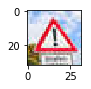

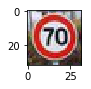

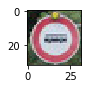

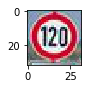

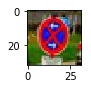

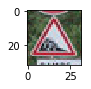

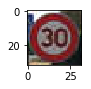

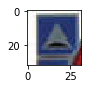

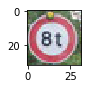

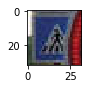

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import os

#files = os.listdir('panneaux')
files = [name for name in os.listdir('panneaux') if name[-9:] == '_sign.jpg']
print(files)    
images = [cv2.imread(os.path.join('panneaux',filename)) for filename in files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
images = np.stack(images)
print(images.shape)
# Display images
for img in images:
    show_sign(img)

### Predict the Sign Type for Each Image

In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)
In: <class 'numpy.ndarray'> <class 'numpy.float32'> (32, 32, 3)


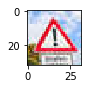

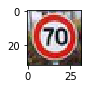

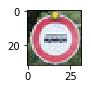

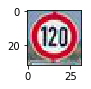

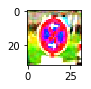

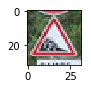

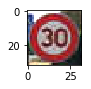

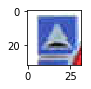

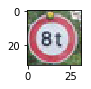

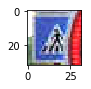

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Preprocessing
X_norm_new = normalize_images(images)
for img in X_norm_new:
    show_sign(img, in_mini=-1., in_maxi=1.)


In [19]:
# Prediction pipeline
predict_operation = tf.nn.softmax(logits, name='predict')

def predict(X_data):
    num_examples = len(X_data)
    with tf.Session() as sess:
        #saver.restore(sess, tf.train.latest_checkpoint('.'))
        saver.restore(sess, './lenet')
        cls_ = sess.run(predict_operation, feed_dict={x: X_data, keep_prob: 1.})
        #for offset in range(0, num_examples, BATCH_SIZE):
        #    batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #    cls_ = sess.run(predict_operation, feed_dict={x: batch_x, keep_prob: 1.})
        classes = tf.argmax(cls_,axis=1).eval(session=sess)
    return cls_, classes

predictions, classes = predict(X_norm_new)
print(type(classes))
scores = [vec[code] for vec, code in zip(predictions, classes)]
print(classes)
print(scores)

<class 'numpy.ndarray'>
[18  4  9  8  1 29  1 39  8 18]
[1.0, 0.99992788, 1.0, 1.0, 0.82792431, 0.99953234, 0.99999714, 0.98813021, 0.30123609, 0.85954869]


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# The signs found on the web include 5 German signs, and 5 French signs
# Signs across EU are supposed to be sufficiently standardised to allow drivers to travel without any specific training.

# 1st is a general danger sign
# 2nd is a 70 km/h speed limit
# 3rd is not in the training set. It is a French 'Busses prohibited' sign: interdiction red circle is correctly seen however.
# 4th is a 120 km/h speed limit
# 5th is a german 'Stopping and parking prohibited' sign, but parking signs are not in the training set.
# 6th is not in the training set. It is a French red triangle sign that means "12 pct slope ahead". Construction work is seen.
# 7th is a 30 km/h speed limit
# 8th is not in the training set. It is a French square blue sign that means "speed bump ahead" 
# 9th is not in the training set. It is a French "Vehicles over 8 metric tons prohibited". The nearest, 3.5t is code 16. 
# 10th is not in the training set. It is a French square blue sign which means "ped crossing ahead"

# Correct (as far as possible) traffic sign shape
y_new = [18, 4, -1, 8, -1, -1, 1, -1, -1, -1]

# For the 4th, 5th, 8th and 10th, the classifier is uncertain (less than 97%)

# Accuracy is 40% (4 out of 10), but the 4 signs included in the training set are correctly recognized.
# The main reason for failure is the fact that the training set is only German and does not include parking related signs.
# Half of the new signs are French only, and the two blue squares do not even look like any sign from the training set.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

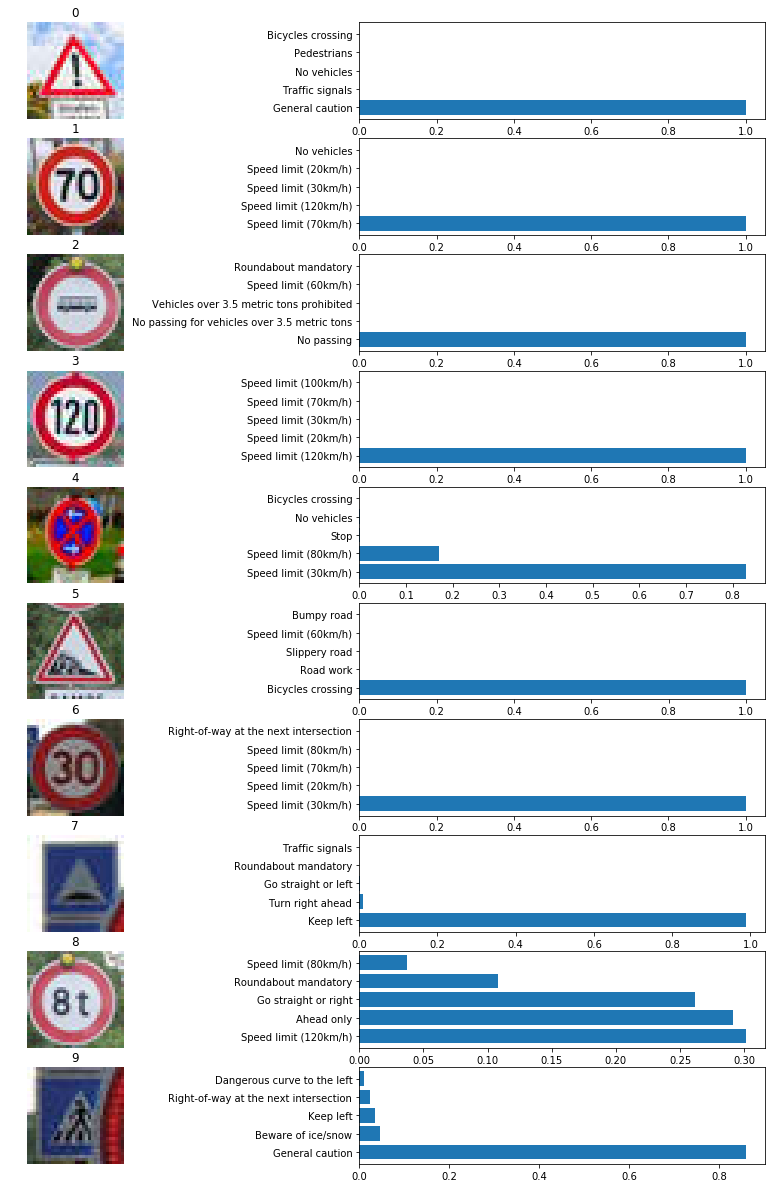

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# Top 5 pipeline
top5_operation = tf.nn.top_k(predict_operation, name='top5', k=5)

def top_five(X_data):
    num_examples = len(X_data)
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        top5 = sess.run(top5_operation, feed_dict={x: X_data, keep_prob: 1.})
        #for offset in range(0, num_examples, BATCH_SIZE):
        #    batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #    y = sess.run(predict_operation, feed_dict={x: batch_x, keep_prob: 1.})
    return top5

top5 = top_five(X_norm_new)
#print(top5)
#print(sign_names.loc[:,'SignName'])

plt.figure(figsize=(16, 21))
for i in range(10):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(10, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top5.values[i, :])
    labs=[sign_names.loc[j,'SignName'] for j in top5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [138]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    print(image_input.shape)
    activation = tf_activation.eval(session=sess,feed_dict={x: image_input, y:0., keep_prob: 1.})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In: <class 'numpy.ndarray'> <class 'numpy.uint8'> (32, 32, 3)


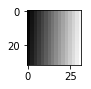

In [75]:
colorbands = np.zeros(shape=(7,32,32,3),dtype=np.uint8)
colors = np.array([[1,0,0],[0,1,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[1,1,1]])
for k_ in range(7):    
    for i_ in range(0,32,2) :
        for j_ in range(0,32,2) : 
            pixel = (((i_//2)*16) + j_//2) * colors[k_]
            #print(pixel)
            colorbands[k_, j_, i_] = pixel
            colorbands[k_, j_+1, i_] = pixel
            colorbands[k_, j_, i_+1] = pixel
            colorbands[k_, j_+1, i_+1] = pixel
#show_sign(colorbands[6])
colorbands = recode(colorbands,in_mini=0, in_maxi=255, mini=-1., maxi=1., out_type=np.float32)

In [82]:
import tensorflow as tf
# Get Saver
saver=tf.train.Saver()

# Run colorspace pipeline on test pictures
with tf.Session() as sess:
    # Initialise
    saver.restore(sess, './lenet')
    # Prepare feed_dict
    #X_visu = X_norm_new
    X_visu = colorbands
    data = sess.run(recolored, feed_dict={x: X_visu, keep_prob: 1.})
    print(type(data))
    

<class 'numpy.ndarray'>


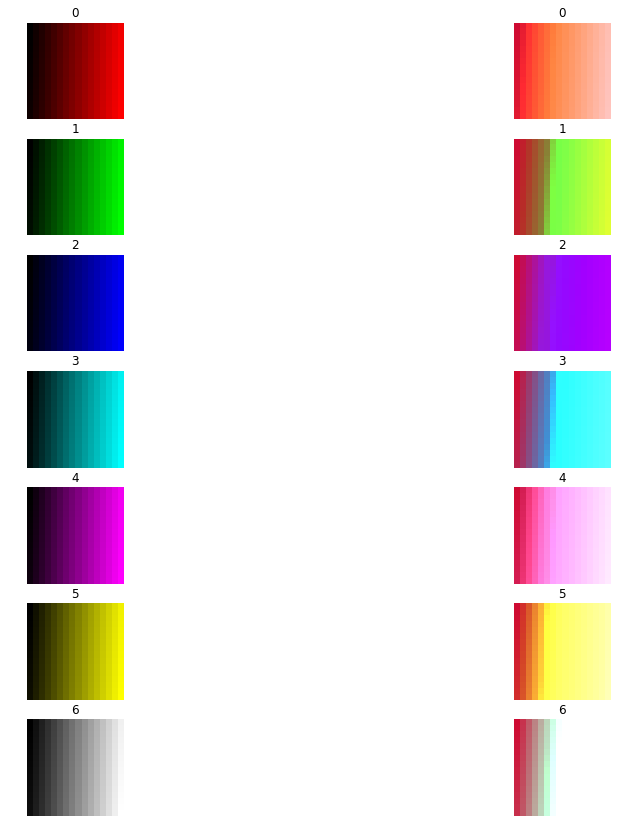

In [83]:
plt.figure(figsize=(16, 21))
for i_,img in enumerate(data):
    plt.subplot(10, 2, 2*i_+2)
    plt.imshow(recode(data[i_],mini=0.,maxi=1.,in_mini=-1.,in_maxi=1.)) 
    plt.title(i_)
    plt.axis('off')
    plt.subplot(10, 2, 2*i_+1)
    plt.imshow(recode(X_visu[i_],mini=0.,maxi=1.,in_mini=-1.,in_maxi=1.))
    plt.title(i_)
    plt.axis('off')
plt.show()